<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%96%91%EC%9E%90%EC%BB%B4%EC%88%98%ED%96%89%EB%B0%A9%EB%B2%95_aer_ibm_ionq_qpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-ionq
!python3 -m pip install qiskit-ibmq-provider
!python3 -m pip install qiskit-aer

In [72]:
# IBMQ Cloud 서비스 사용하기 위한 준비
from qiskit import IBMQ, transpile, assemble

# IBM Quantum Provider에 등록된 계정 정보를 입력합니다.
IBMQ.save_account("97106e04a3ba5b2b7c4cd1a7c7676a8cb9ce701741361e830e4d28b6488a755dce28b2f3414eb3ccdca0c431d2d134375e00261f4a13b2536f333e45d7451fde", overwrite=True)  #여기에 API Key 입력 필요
IBMQ.load_account( )

# IBM Quantum Provider로 접속합니다.
ibmq_provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main") #IBMQ Cloud의 Instance 부분 입력
backends = ibmq_provider.backends()

# 백엔드 리스트 출력
print("Available backends:")

for backend in backends:
  print(backend.name())
###for

Available backends:
ibmq_qasm_simulator
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_jakarta
ibmq_manila
ibm_lagos
ibm_nairobi
ibm_perth


In [73]:
# IonQ H/W Cloud를 사용하기 위한 준비
from qiskit_ionq import IonQProvider

# IonQ Cloud 서비스 사용하기 위한 준비
ionq_provider = IonQProvider("d1a351V2K4fuxw97S5Ydt99e9UvxM32h") #IonQ Cloud에서 Access Key를 복사해 넣어야 합니다.
# Show all backends:

backends = ionq_provider.backends()

# 백엔드 리스트 출력
print("Available backends:")

for backend in backends:
  print(backend.name())
###for

Available backends:
ionq_simulator
ionq_qpu


In [74]:
# Qiskit Local Simulator 사용하기 위한 준비
from qiskit import Aer

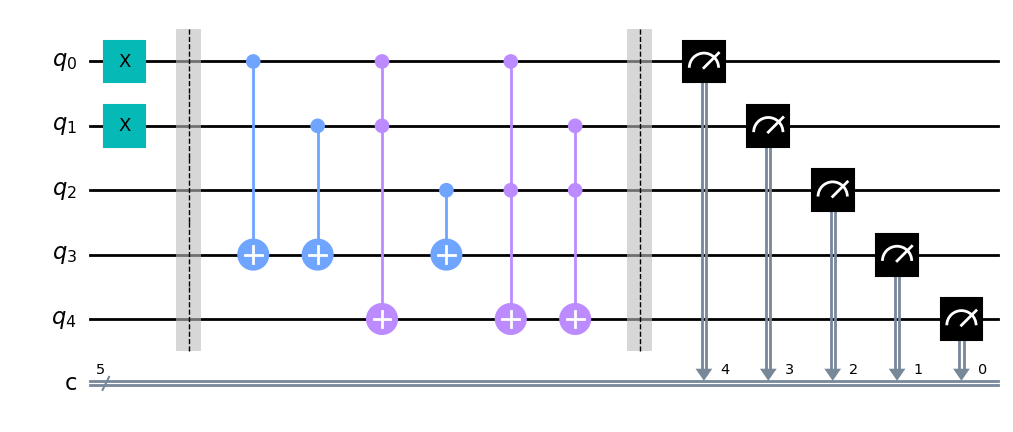

In [75]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# 양자 회로 생성
qc = QuantumCircuit(5, 5)  # 5개의 양자 비트와 2개의 클래식 비트를 사용합니다.

# 입력 비트 설정 (A=1, B=1)
qc.x(0)  # A 비트를 1로 설정
qc.x(1)  # B 비트를 1로 설정
qc.barrier()

# 전가산기 회로 구현
qc.cx(0, 3) # XOR 게이트 (A와 B의 논리합)
qc.cx(1, 3) # XOR 게이트 (A와 B의 논리합)
qc.ccx(0, 1, 4) # AND 게이트 (A와 B의 논리곱)
qc.cx(2, 3) # XOR 게이트 (A와 B의 논리합)
qc.ccx(0, 2, 4) # AND 게이트 (A와 B의 논리곱)
qc.ccx(1, 2, 4) # AND 게이트 (A와 B의 논리곱)
qc.barrier()

# 결과를 측정하여 Sum과 Carry 출력을 얻습니다.
qc.measure(0, 4)  # 큐비트를 클래식 비트 4에 매핑
qc.measure(1, 3)  # 큐비트를 클래식 비트 3에 매핑
qc.measure(2, 2)  # 보조비트를 클래식 비트 2에 매핑
qc.measure(3, 1)  # Sum(Result) 비트를 클래식 비트 1에 매핑
qc.measure(4, 0)  # Carry 비트를 클래식 비트 0에 매핑

qc.draw('mpl')

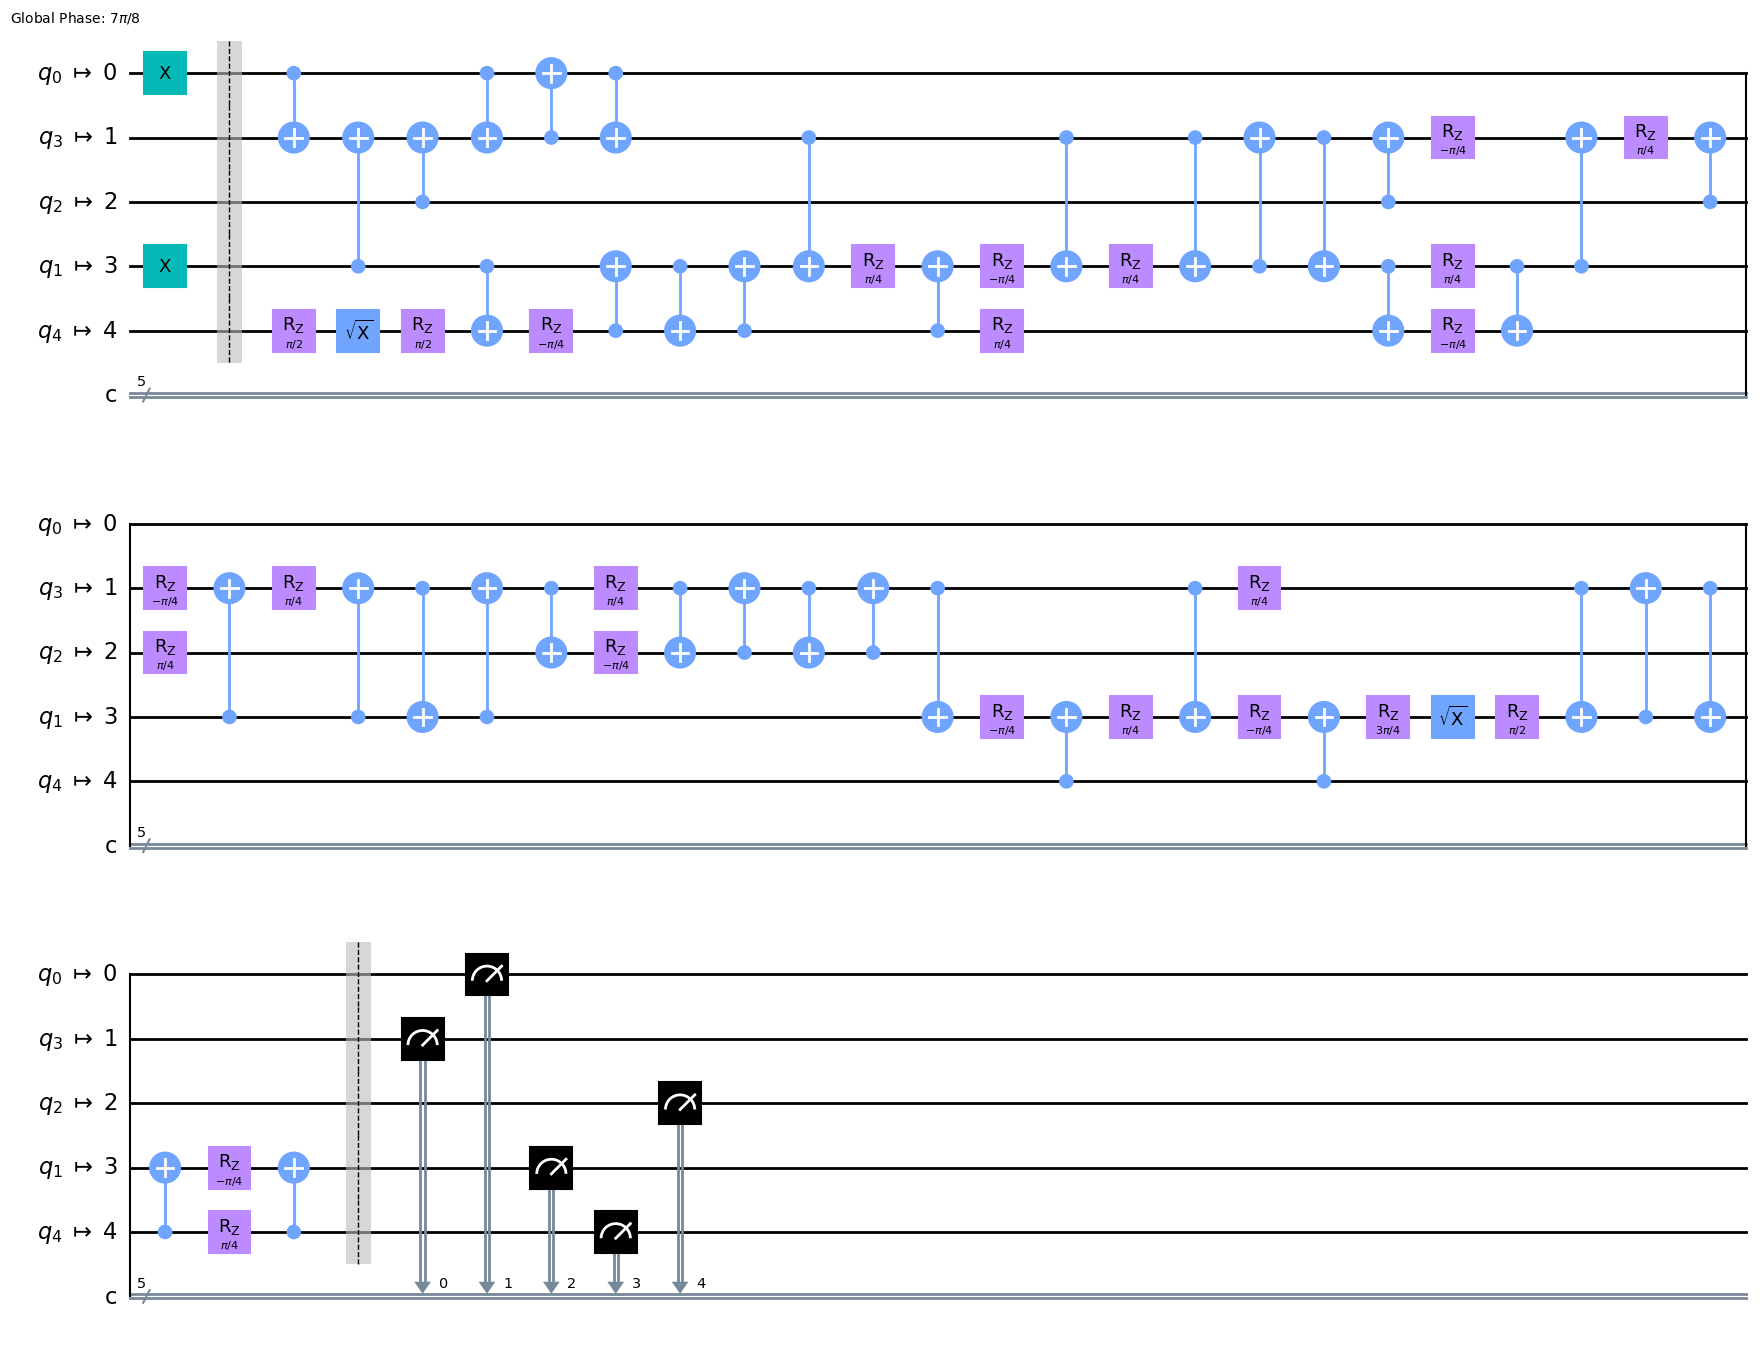

In [88]:
#여러 장치들에게 선택적으로 수행시키기 위한 준비
from qiskit import execute
#
#백엔드들을 이용한 실제 장치나 시뮬레이터를 이용한 실행
#
#backend = ionq_provider.get_backend('ionq_simulator')
#backend = ionq_provider.get_backend('ionq_qpu')
#backend = ibmq_provider.get_backend('ibmq_qasm_simulator') # Cloud상 시뮬레이터
backend = ibmq_provider.get_backend('ibmq_quito')
#backend = Aer.get_backend('qasm_simulator')  #Local Qiskit Aer 시뮬레이터 사용

transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl')

In [81]:
from qiskit.providers.jobstatus import JobStatus
import time

job = execute(transpiled_circuit, backend, shots=1024)
#job = backend.run(qc, shots=2048) # if you don’t pass a shots kwarg, it defaults to 1024

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(30)
###while

# grab a coffee! This can take up to a few minutes.
# once we break out of that while loop, we know our job is finished
print("Job status is", job.status() )

# 결과 출력
result = job.result()
counts = result.get_counts()
print(counts)

Job status is JobStatus.QUEUED
Job status is JobStatus.DONE
{'11001': 1024}


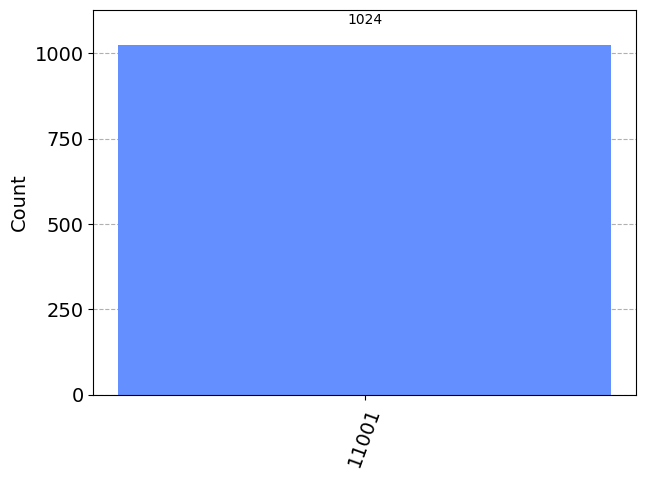

In [82]:
plot_histogram(data=counts)